# Step 1. Import Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [44]:
import requests ## simple elegant HTTP library
image_url="https://github.com/poojasaxena/tensorflow-developer-zertificate-coursera/raw/main/course2_convolutional-neural-networks-tensorflow/02_augmentation-a-technique-to-avoid-overfitting/images/cat.jpg"
image_r = requests.get(url=image_url, allow_redirects=True)
open('image.jpg', 'wb').write(image_r.content)

56803

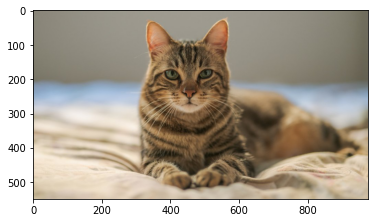

In [45]:
image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data_set = np.expand_dims(image, 0) ## Expanding dimension on axis=0 ie. (1, shape)
plt.imshow(data_set[0])

In [46]:
def default_datagen():
    datagen = ImageDataGenerator(fill_mode='constant', dtype=int) ## ie. do nothing on image
    datagen.fit(data_set)
    return datagen

In [104]:
def plot_augmentation(datagen, dataset, nrows=2, ncols=5):
    ''' Remember, though we are ploting 10 images, augmentation produce slight variated version on every iteration
    one could test it by changeing nrows=4, 5 and using width_shift_range =0.5 (in order to be able to see the max
    change)'''
    n_images = nrows * ncols
    gen_flow = datagen.flow(data_set)
    
    plt.figure(figsize=(ncols*4, nrows*3))
    
    for image_index in range(n_images):
        image = next(gen_flow)
        plt.subplot(nrows, ncols, image_index+1)
        #plt.axis('off')
        plt.imshow(image[0].astype('uint8'))

# Step 2. Augmentation Parameter

## 1. Random Width Shift Augmentation (Width_shift_range)


1. on keras [website](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator), it says 'wrg	Width shift range, as a float fraction of the width.'
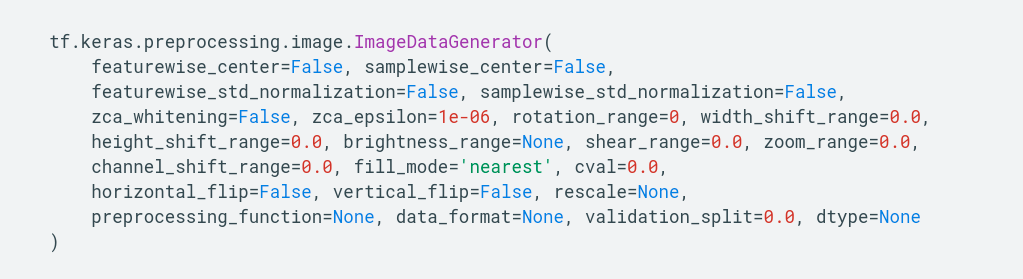

2. if we take width_shift_range < 1 , it will work on the fraction of the image size
3. if we take width_shift_range >=1, it will work on the pixel size of the image, as shown here

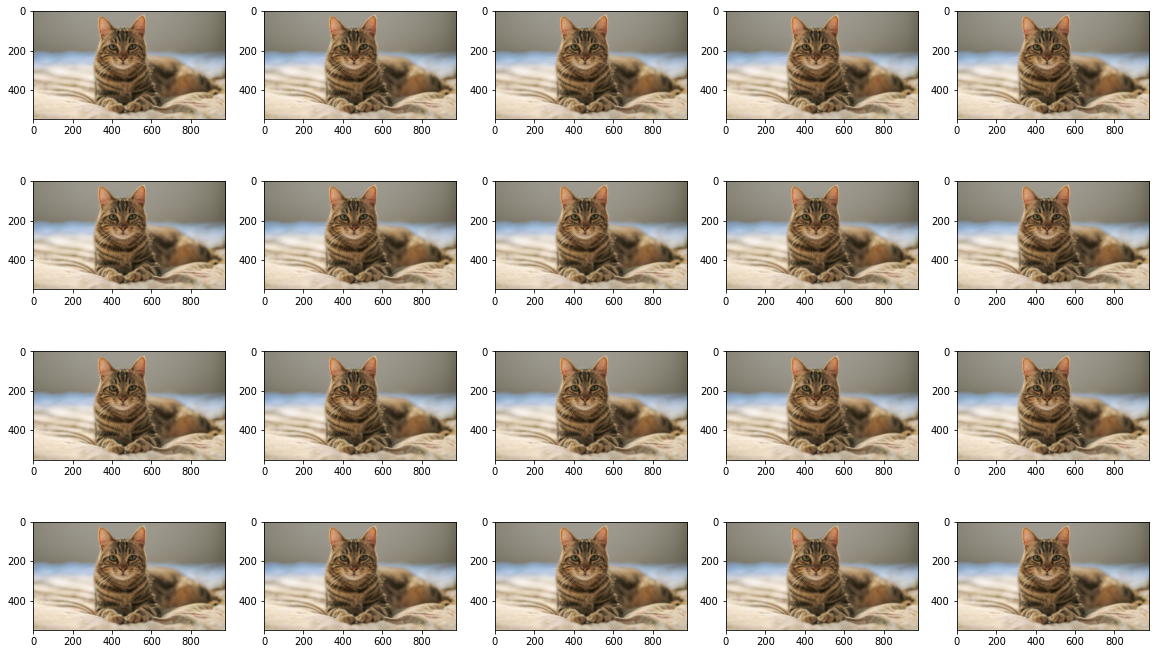

In [82]:
datagen = default_datagen()
datagen.width_shift_range =  1 # or 1, 2, 5
plot_augmentation(datagen, data_set)

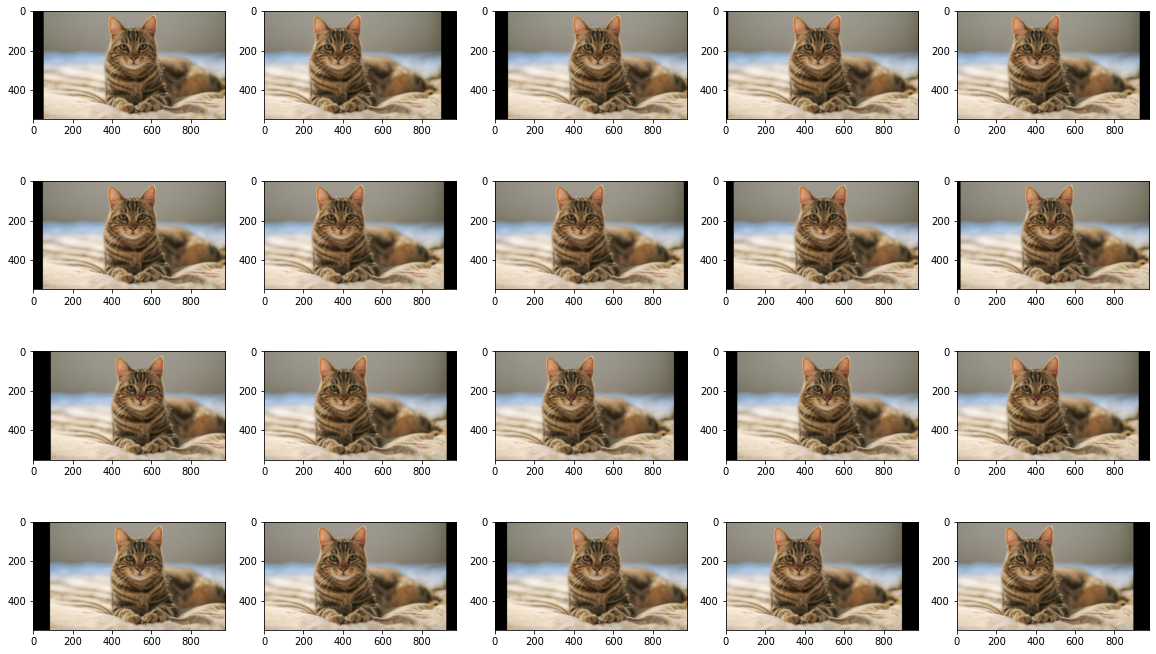

In [83]:
datagen = default_datagen()
datagen.width_shift_range =  0.1 ## should change it to max 10 %
plot_augmentation(datagen, data_set)

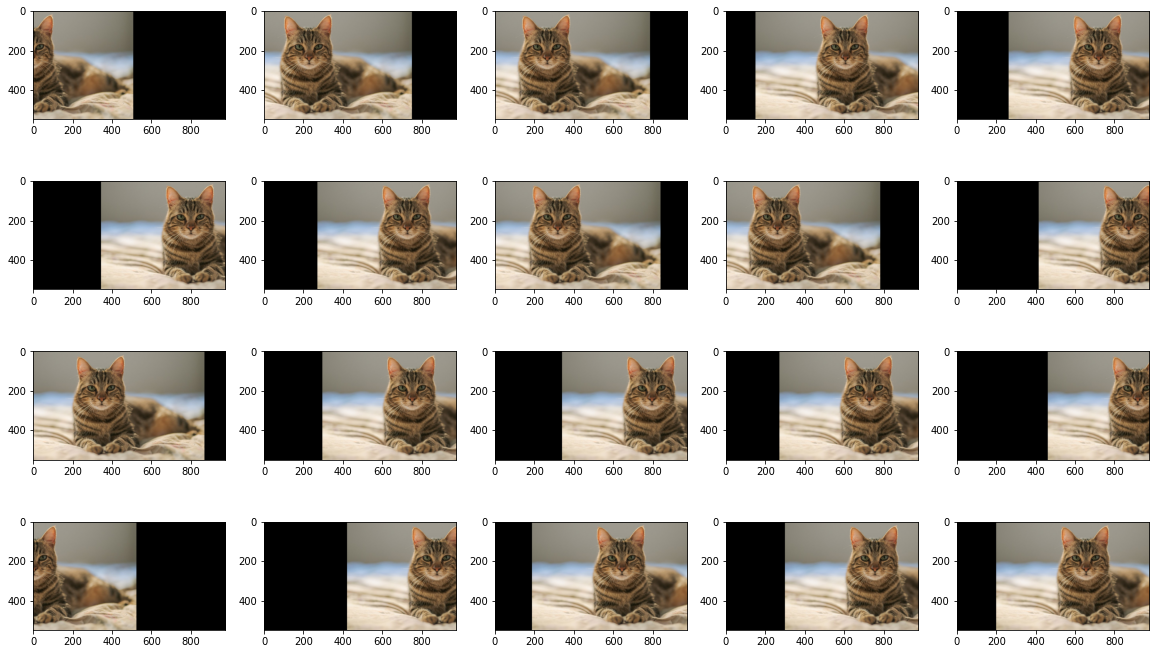

In [86]:
datagen = default_datagen()
datagen.width_shift_range =  0.5
## expect 50% horizontal variation, as its clear the horizontal pixel are shifted till 500 px
plot_augmentation(datagen, data_set)

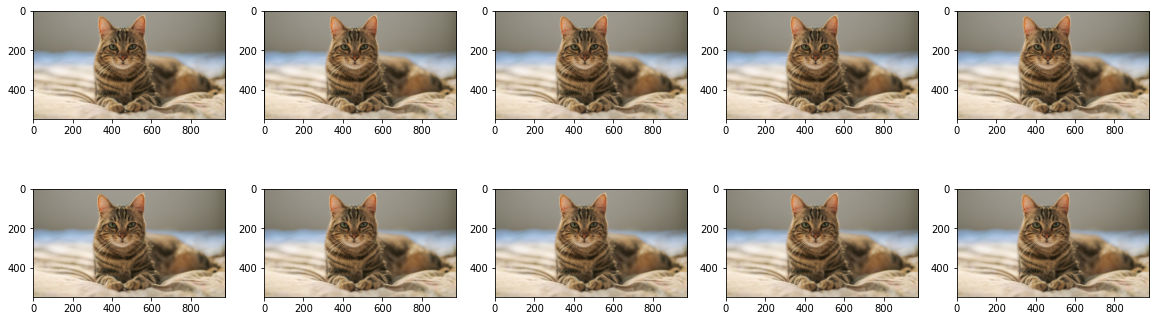

In [100]:
datagen = default_datagen()
datagen.width_shift_range =  5  # > 1, it is working on pixel size of the image 32/3
plot_augmentation(datagen, data_set)

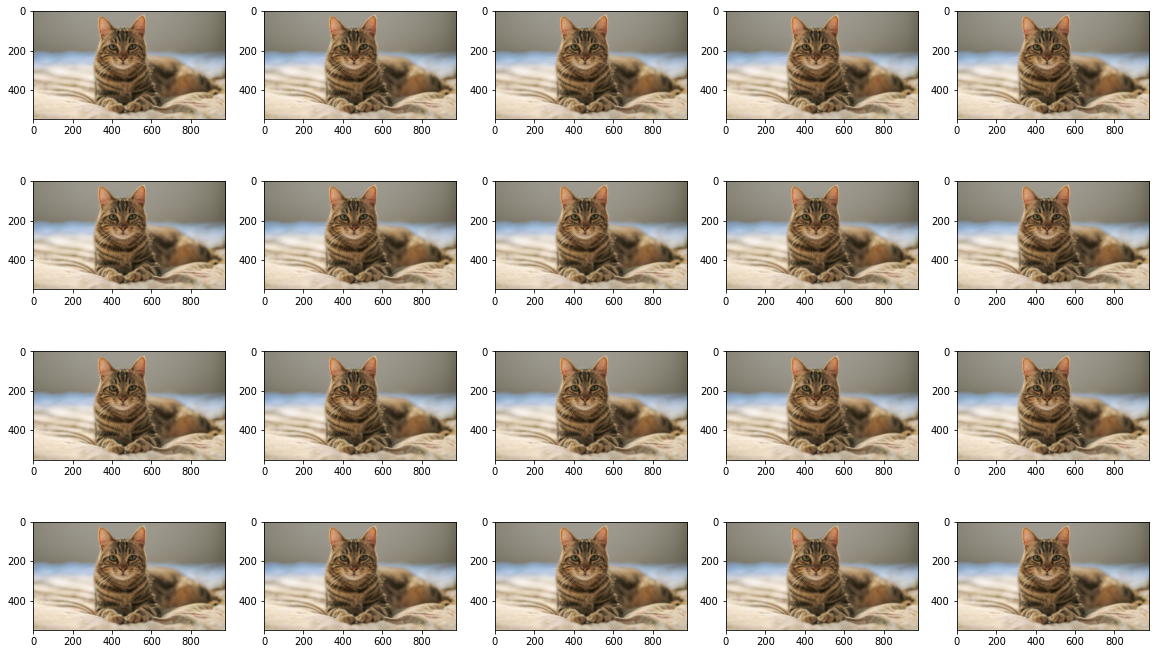

In [103]:
datagen = default_datagen()
datagen.width_shift_range =  1 ## it seems to again work on the pixel size of the image
plot_augmentation(datagen, data_set)

## 2. Random Height Shift Augmentation (height_shift_range)

1.  works the same as width_shift_range, except it works in the horizontal direction

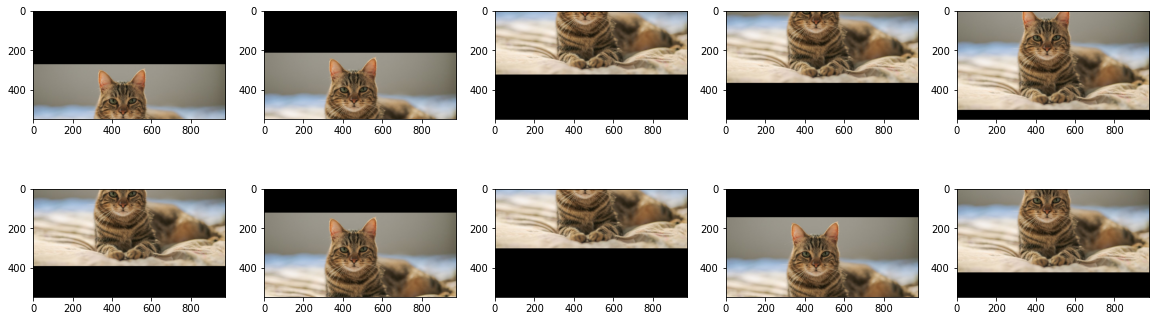

In [107]:
datagen = default_datagen()
datagen.height_shift_range = 0.5
plot_augmentation(datagen, data_set)

## 3. Random Horizonral Flip (horizontal_flip)
1. it is boolean, either apply (true) or not (false)

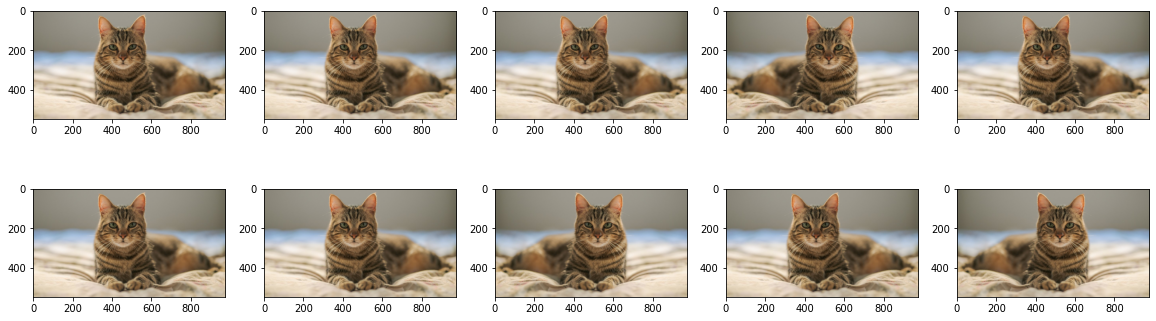

In [108]:
datagen = default_datagen()
datagen.horizontal_flip  = True
plot_augmentation(datagen, data_set)

## 4. Random Rotation Augmentation  (rotation_range)

1. it is in degrees
2. if we provide rotation_range=90, we could see a clear 90 degree rotation

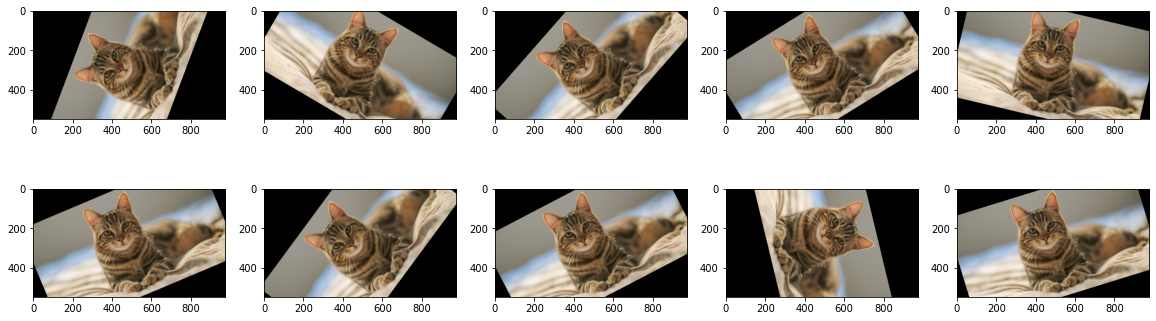

In [118]:
datagen = default_datagen()
datagen.rotation_range = 90 ## in degrees
plot_augmentation(datagen, data_set)

## 5. Random Brightness Augmenration (brightness_range)

1. Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, 
e.g. [1.0, 1.5], where 1.0 has no effect on brightness.



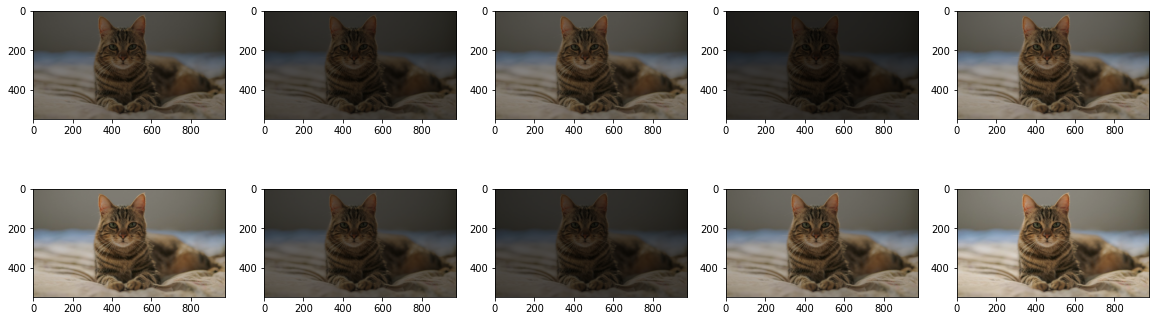

In [126]:
datagen = default_datagen()
datagen.brightness_range = [0.2,1.0] # 20% till original brightness
plot_augmentation(datagen, data_set)

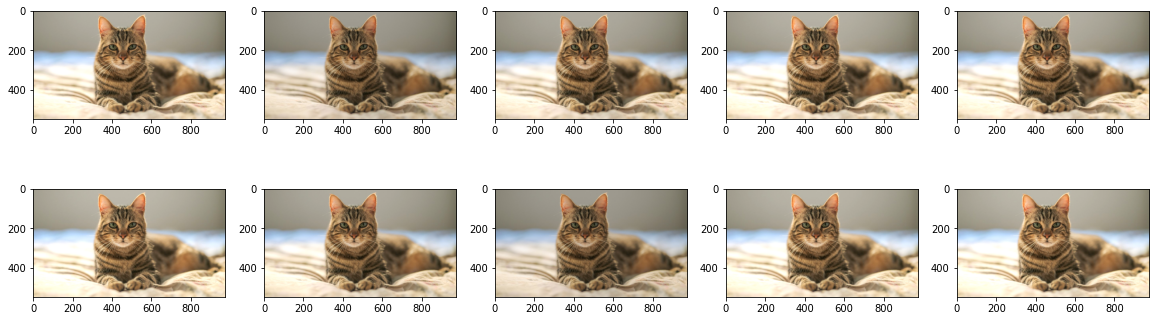

In [127]:
datagen = default_datagen()
datagen.brightness_range = [1.2,1.0] # 20% till original brightness
plot_augmentation(datagen, data_set)

## 6. Random Shear Augmentation (shear_range)

1. shear_range :Float, Shear Intensity (Shear angle in counter-clockwise direction in degrees)

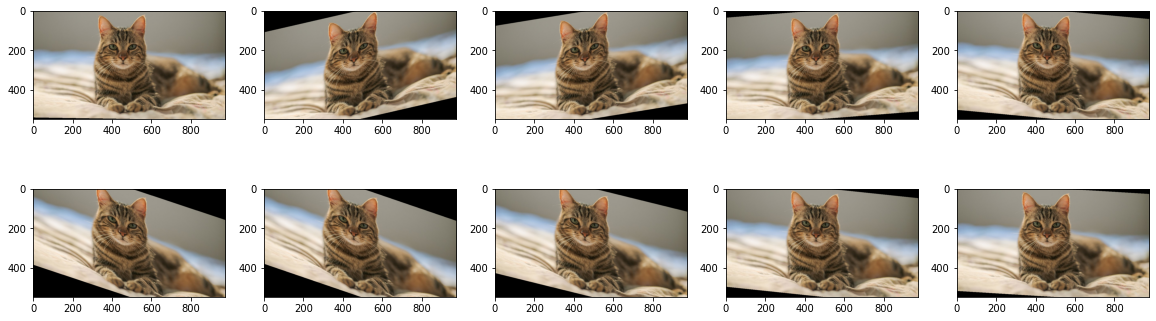

In [131]:
datagen = default_datagen()
datagen.shear_range = 20 # degree
plot_augmentation(datagen, data_set)

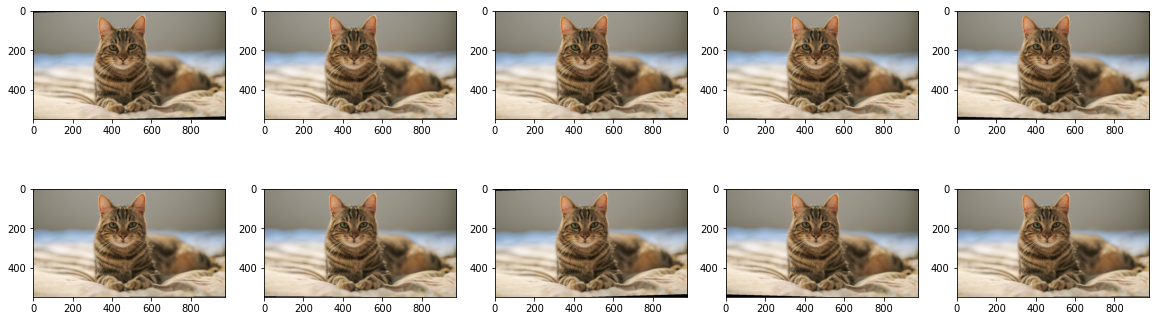

In [135]:
datagen = default_datagen()
datagen.shear_range = 2 # degree
plot_augmentation(datagen, data_set)

## 7. Random Zoom Augmentation (zoom_range) 

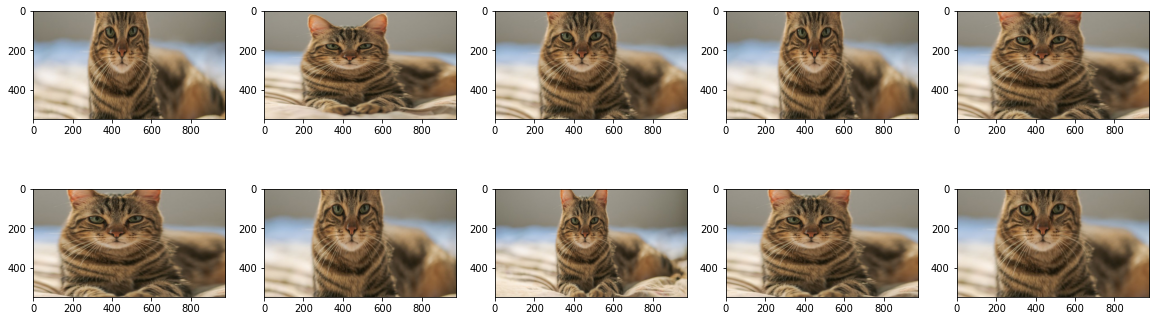

In [141]:
datagen=default_datagen()
datagen.zoom_range=[0.5, 1.0] # zoom range: [lower, upper]
plot_augmentation(datagen, data_set)

## 8. Random Fill Augmentation (fill_mode)

1. One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. 
2. Points outside the boundaries of the input are filled according to the given mode:
 * 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
 * 'nearest': aaaaaaaa|abcd|dddddddd
 * 'reflect': abcddcba|abcd|dcbaabcd
 * 'wrap': abcdabcd|abcd|abcdabcd


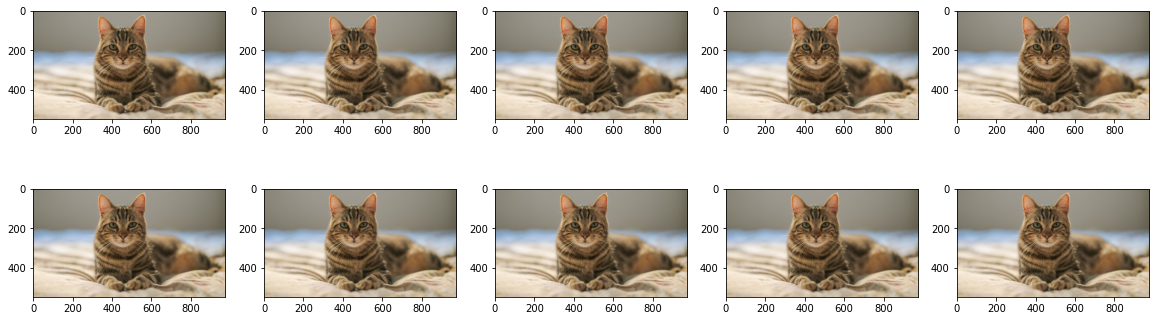

In [145]:
datagen = default_datagen()
datagen.fill_mode='wrap'
plot_augmentation(datagen, data_set)